In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: RIO
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


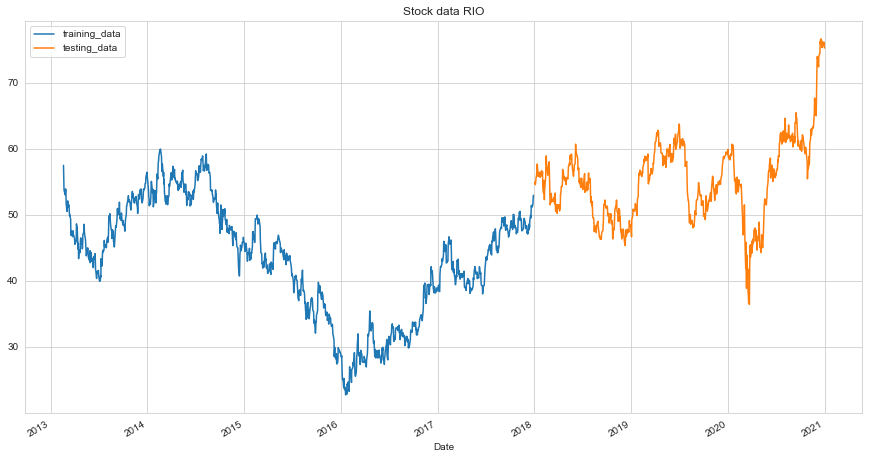

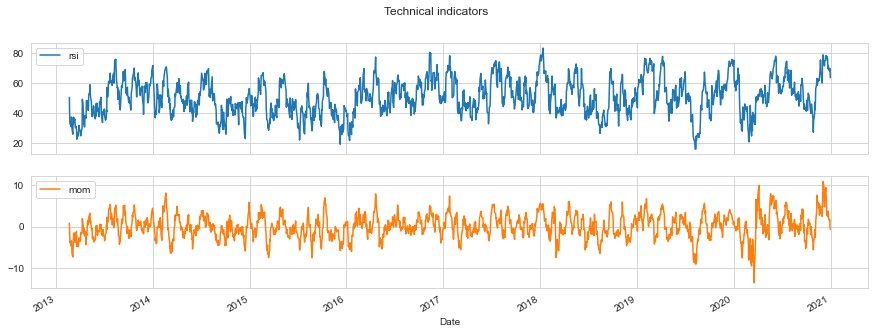

In [2]:
stock_name = 'rio'.upper()
industry = 'Basic Materials'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1193.78, duration: 0:00:00.398088
episode: 2/2000, episode end value: 1120.60, duration: 0:00:00.363081
episode: 3/2000, episode end value: 1169.27, duration: 0:00:00.372086
episode: 4/2000, episode end value: 1214.85, duration: 0:00:00.335076
episode: 5/2000, episode end value: 1153.28, duration: 0:00:00.370082
episode: 6/2000, episode end value: 1177.06, duration: 0:00:00.288062
episode: 7/2000, episode end value: 1159.68, duration: 0:00:00.309068
episode: 8/2000, episode end value: 1159.20, duration: 0:00:00.316073
episode: 9/2000, episode end value: 1135.74, duration: 0:00:00.299067
episode: 10/2000, episode end value: 1174.90, duration: 0:00:00.317076
episode: 11/2000, episode end value: 1151.83, duration: 0:00:00.326071
episode: 12/2000, episode end value: 1172.66, duration: 0:00:00.311068
episode: 13/2000, episode end value: 1175.73, duration: 0:00:00.281064
episode: 14/2000, episode end value: 1220.46, duration: 0:00:00.308069
episode: 15/200

episode: 117/2000, episode end value: 1172.45, duration: 0:00:00.438100
episode: 118/2000, episode end value: 1189.32, duration: 0:00:00.396090
episode: 119/2000, episode end value: 1159.91, duration: 0:00:00.354079
episode: 120/2000, episode end value: 1209.16, duration: 0:00:00.400093
episode: 121/2000, episode end value: 1172.83, duration: 0:00:00.371081
episode: 122/2000, episode end value: 1172.54, duration: 0:00:00.464105
episode: 123/2000, episode end value: 1205.81, duration: 0:00:00.419093
episode: 124/2000, episode end value: 1371.63, duration: 0:00:00.340075
episode: 125/2000, episode end value: 1181.48, duration: 0:00:00.428099
episode: 126/2000, episode end value: 1213.54, duration: 0:00:00.483107
episode: 127/2000, episode end value: 1218.93, duration: 0:00:00.401092
episode: 128/2000, episode end value: 1195.63, duration: 0:00:00.461100
episode: 129/2000, episode end value: 1144.42, duration: 0:00:00.435100
episode: 130/2000, episode end value: 1211.11, duration: 0:00:00

episode: 231/2000, episode end value: 1159.79, duration: 0:00:00.375750
episode: 232/2000, episode end value: 1214.35, duration: 0:00:00.449100
episode: 233/2000, episode end value: 1201.38, duration: 0:00:00.438099
episode: 234/2000, episode end value: 1215.03, duration: 0:00:00.396525
episode: 235/2000, episode end value: 1198.07, duration: 0:00:00.428285
episode: 236/2000, episode end value: 1173.56, duration: 0:00:00.351084
episode: 237/2000, episode end value: 1207.85, duration: 0:00:00.460106
episode: 238/2000, episode end value: 1214.93, duration: 0:00:00.433101
episode: 239/2000, episode end value: 1210.73, duration: 0:00:00.404093
episode: 240/2000, episode end value: 1147.50, duration: 0:00:00.423093
episode: 241/2000, episode end value: 1239.55, duration: 0:00:00.415093
episode: 242/2000, episode end value: 1209.51, duration: 0:00:00.389089
episode: 243/2000, episode end value: 1187.93, duration: 0:00:00.451179
episode: 244/2000, episode end value: 1183.60, duration: 0:00:00

episode: 345/2000, episode end value: 1253.83, duration: 0:00:00.433112
episode: 346/2000, episode end value: 1170.62, duration: 0:00:00.425730
episode: 347/2000, episode end value: 1193.10, duration: 0:00:00.391086
episode: 348/2000, episode end value: 1203.94, duration: 0:00:00.368082
episode: 349/2000, episode end value: 1190.17, duration: 0:00:00.490112
episode: 350/2000, episode end value: 1197.31, duration: 0:00:00.390093
episode: 351/2000, episode end value: 1170.71, duration: 0:00:00.424093
episode: 352/2000, episode end value: 1174.82, duration: 0:00:00.402085
episode: 353/2000, episode end value: 1235.52, duration: 0:00:00.458103
episode: 354/2000, episode end value: 1177.39, duration: 0:00:00.444100
episode: 355/2000, episode end value: 1198.86, duration: 0:00:00.379083
episode: 356/2000, episode end value: 1177.11, duration: 0:00:00.371087
episode: 357/2000, episode end value: 1162.42, duration: 0:00:00.449004
episode: 358/2000, episode end value: 1218.66, duration: 0:00:00

episode: 459/2000, episode end value: 1158.85, duration: 0:00:00.445108
episode: 460/2000, episode end value: 1162.16, duration: 0:00:00.376082
episode: 461/2000, episode end value: 1166.22, duration: 0:00:00.403092
episode: 462/2000, episode end value: 1207.33, duration: 0:00:00.433095
episode: 463/2000, episode end value: 1218.76, duration: 0:00:00.369082
episode: 464/2000, episode end value: 1214.29, duration: 0:00:00.413093
episode: 465/2000, episode end value: 1198.96, duration: 0:00:00.411093
episode: 466/2000, episode end value: 1232.98, duration: 0:00:00.372084
episode: 467/2000, episode end value: 1171.55, duration: 0:00:00.426097
episode: 468/2000, episode end value: 1219.47, duration: 0:00:00.447103
episode: 469/2000, episode end value: 1159.26, duration: 0:00:00.518121
episode: 470/2000, episode end value: 1181.40, duration: 0:00:00.490105
episode: 471/2000, episode end value: 1154.02, duration: 0:00:00.467109
episode: 472/2000, episode end value: 1223.26, duration: 0:00:00

episode: 573/2000, episode end value: 1183.37, duration: 0:00:00.474108
episode: 574/2000, episode end value: 1251.78, duration: 0:00:00.380085
episode: 575/2000, episode end value: 1243.02, duration: 0:00:00.428096
episode: 576/2000, episode end value: 1229.50, duration: 0:00:00.372104
episode: 577/2000, episode end value: 1223.30, duration: 0:00:00.431097
episode: 578/2000, episode end value: 1176.11, duration: 0:00:00.447094
episode: 579/2000, episode end value: 1165.80, duration: 0:00:00.419095
episode: 580/2000, episode end value: 1216.16, duration: 0:00:00.401089
episode: 581/2000, episode end value: 1238.45, duration: 0:00:00.448099
episode: 582/2000, episode end value: 1186.03, duration: 0:00:00.432098
episode: 583/2000, episode end value: 1242.07, duration: 0:00:00.510112
episode: 584/2000, episode end value: 1173.39, duration: 0:00:00.449101
episode: 585/2000, episode end value: 1162.02, duration: 0:00:00.438099
episode: 586/2000, episode end value: 1225.34, duration: 0:00:00

episode: 687/2000, episode end value: 1222.28, duration: 0:00:00.538122
episode: 688/2000, episode end value: 1266.80, duration: 0:00:00.503113
episode: 689/2000, episode end value: 1193.51, duration: 0:00:00.464104
episode: 690/2000, episode end value: 1259.42, duration: 0:00:00.488109
episode: 691/2000, episode end value: 1194.41, duration: 0:00:00.529120
episode: 692/2000, episode end value: 1222.58, duration: 0:00:00.517116
episode: 693/2000, episode end value: 1192.46, duration: 0:00:00.545121
episode: 694/2000, episode end value: 1198.29, duration: 0:00:00.520116
episode: 695/2000, episode end value: 1198.58, duration: 0:00:00.497111
episode: 696/2000, episode end value: 1239.82, duration: 0:00:00.487114
episode: 697/2000, episode end value: 1417.39, duration: 0:00:00.330073
episode: 698/2000, episode end value: 1222.85, duration: 0:00:00.477108
episode: 699/2000, episode end value: 1217.89, duration: 0:00:00.552124
episode: 700/2000, episode end value: 1209.35, duration: 0:00:00

episode: 801/2000, episode end value: 1186.24, duration: 0:00:00.448102
episode: 802/2000, episode end value: 1225.85, duration: 0:00:00.465104
episode: 803/2000, episode end value: 1286.34, duration: 0:00:00.306072
episode: 804/2000, episode end value: 1177.81, duration: 0:00:00.343074
episode: 805/2000, episode end value: 1171.13, duration: 0:00:00.430097
episode: 806/2000, episode end value: 1190.18, duration: 0:00:00.409097
episode: 807/2000, episode end value: 1389.54, duration: 0:00:00.268058
episode: 808/2000, episode end value: 1261.30, duration: 0:00:00.367084
episode: 809/2000, episode end value: 1237.70, duration: 0:00:00.428095
episode: 810/2000, episode end value: 1219.30, duration: 0:00:00.463107
episode: 811/2000, episode end value: 1168.04, duration: 0:00:00.426097
episode: 812/2000, episode end value: 1207.55, duration: 0:00:00.381079
episode: 813/2000, episode end value: 1181.12, duration: 0:00:00.413096
episode: 814/2000, episode end value: 1213.61, duration: 0:00:00

episode: 915/2000, episode end value: 1212.99, duration: 0:00:00.439099
episode: 916/2000, episode end value: 1226.58, duration: 0:00:00.480112
episode: 917/2000, episode end value: 1247.39, duration: 0:00:00.403094
episode: 918/2000, episode end value: 1421.71, duration: 0:00:00.402085
episode: 919/2000, episode end value: 1179.34, duration: 0:00:00.393089
episode: 920/2000, episode end value: 1252.31, duration: 0:00:00.431098
episode: 921/2000, episode end value: 1227.37, duration: 0:00:00.461110
episode: 922/2000, episode end value: 1202.10, duration: 0:00:00.390081
episode: 923/2000, episode end value: 1256.20, duration: 0:00:00.452102
episode: 924/2000, episode end value: 1188.89, duration: 0:00:00.382090
episode: 925/2000, episode end value: 1215.91, duration: 0:00:00.454098
episode: 926/2000, episode end value: 1176.62, duration: 0:00:00.354080
episode: 927/2000, episode end value: 1298.15, duration: 0:00:00.307073
episode: 928/2000, episode end value: 1200.66, duration: 0:00:00

episode: 1029/2000, episode end value: 1250.11, duration: 0:00:00.429100
episode: 1030/2000, episode end value: 1344.34, duration: 0:00:00.388082
episode: 1031/2000, episode end value: 1415.77, duration: 0:00:00.392092
episode: 1032/2000, episode end value: 1361.06, duration: 0:00:00.453098
episode: 1033/2000, episode end value: 1210.91, duration: 0:00:00.479625
episode: 1034/2000, episode end value: 1233.90, duration: 0:00:00.471349
episode: 1035/2000, episode end value: 1210.44, duration: 0:00:00.400731
episode: 1036/2000, episode end value: 1228.19, duration: 0:00:00.473102
episode: 1037/2000, episode end value: 1221.77, duration: 0:00:00.322071
episode: 1038/2000, episode end value: 1226.80, duration: 0:00:00.453104
episode: 1039/2000, episode end value: 1190.12, duration: 0:00:00.430096
episode: 1040/2000, episode end value: 1227.40, duration: 0:00:00.384098
episode: 1041/2000, episode end value: 1403.02, duration: 0:00:00.321631
episode: 1042/2000, episode end value: 1394.56, dur

episode: 1142/2000, episode end value: 1188.38, duration: 0:00:00.496109
episode: 1143/2000, episode end value: 1230.26, duration: 0:00:00.456169
episode: 1144/2000, episode end value: 1195.29, duration: 0:00:00.413097
episode: 1145/2000, episode end value: 1275.98, duration: 0:00:00.344078
episode: 1146/2000, episode end value: 1217.73, duration: 0:00:00.455818
episode: 1147/2000, episode end value: 1223.68, duration: 0:00:00.496167
episode: 1148/2000, episode end value: 1231.43, duration: 0:00:00.343079
episode: 1149/2000, episode end value: 1204.70, duration: 0:00:00.449109
episode: 1150/2000, episode end value: 1205.66, duration: 0:00:00.357078
episode: 1151/2000, episode end value: 1216.86, duration: 0:00:00.409095
episode: 1152/2000, episode end value: 1189.82, duration: 0:00:00.462110
episode: 1153/2000, episode end value: 1199.81, duration: 0:00:00.389091
episode: 1154/2000, episode end value: 1171.45, duration: 0:00:00.397087
episode: 1155/2000, episode end value: 1226.61, dur

episode: 1255/2000, episode end value: 1198.97, duration: 0:00:00.420695
episode: 1256/2000, episode end value: 1213.01, duration: 0:00:00.367760
episode: 1257/2000, episode end value: 1236.17, duration: 0:00:00.473111
episode: 1258/2000, episode end value: 1234.16, duration: 0:00:00.488109
episode: 1259/2000, episode end value: 1174.22, duration: 0:00:00.450101
episode: 1260/2000, episode end value: 1172.03, duration: 0:00:00.410093
episode: 1261/2000, episode end value: 1161.88, duration: 0:00:00.412092
episode: 1262/2000, episode end value: 1188.90, duration: 0:00:00.461102
episode: 1263/2000, episode end value: 1204.77, duration: 0:00:00.475110
episode: 1264/2000, episode end value: 1265.14, duration: 0:00:00.466625
episode: 1265/2000, episode end value: 1188.41, duration: 0:00:00.413093
episode: 1266/2000, episode end value: 1166.75, duration: 0:00:00.369350
episode: 1267/2000, episode end value: 1163.50, duration: 0:00:00.456102
episode: 1268/2000, episode end value: 1174.52, dur

episode: 1368/2000, episode end value: 1150.49, duration: 0:00:00.450098
episode: 1369/2000, episode end value: 1167.29, duration: 0:00:00.452101
episode: 1370/2000, episode end value: 1204.44, duration: 0:00:00.422097
episode: 1371/2000, episode end value: 1177.16, duration: 0:00:00.407088
episode: 1372/2000, episode end value: 1246.18, duration: 0:00:00.353079
episode: 1373/2000, episode end value: 1230.98, duration: 0:00:00.459105
episode: 1374/2000, episode end value: 1191.34, duration: 0:00:00.425096
episode: 1375/2000, episode end value: 1189.21, duration: 0:00:00.447099
episode: 1376/2000, episode end value: 1224.83, duration: 0:00:00.389090
episode: 1377/2000, episode end value: 1235.23, duration: 0:00:00.434097
episode: 1378/2000, episode end value: 1165.52, duration: 0:00:00.428093
episode: 1379/2000, episode end value: 1196.80, duration: 0:00:00.397089
episode: 1380/2000, episode end value: 1193.83, duration: 0:00:00.476107
episode: 1381/2000, episode end value: 1185.37, dur

episode: 1481/2000, episode end value: 1218.61, duration: 0:00:00.408087
episode: 1482/2000, episode end value: 1257.75, duration: 0:00:00.435100
episode: 1483/2000, episode end value: 1229.56, duration: 0:00:00.376078
episode: 1484/2000, episode end value: 1191.10, duration: 0:00:00.435098
episode: 1485/2000, episode end value: 1157.17, duration: 0:00:00.411096
episode: 1486/2000, episode end value: 1210.96, duration: 0:00:00.448099
episode: 1487/2000, episode end value: 1297.53, duration: 0:00:00.343078
episode: 1488/2000, episode end value: 1196.11, duration: 0:00:00.421095
episode: 1489/2000, episode end value: 1220.10, duration: 0:00:00.481105
episode: 1490/2000, episode end value: 1202.25, duration: 0:00:00.390089
episode: 1491/2000, episode end value: 1234.05, duration: 0:00:00.491109
episode: 1492/2000, episode end value: 1203.51, duration: 0:00:00.403091
episode: 1493/2000, episode end value: 1222.79, duration: 0:00:00.351082
episode: 1494/2000, episode end value: 1221.42, dur

episode: 1594/2000, episode end value: 1182.61, duration: 0:00:00.339080
episode: 1595/2000, episode end value: 1171.91, duration: 0:00:00.377086
episode: 1596/2000, episode end value: 1225.41, duration: 0:00:00.417095
episode: 1597/2000, episode end value: 1190.43, duration: 0:00:00.374079
episode: 1598/2000, episode end value: 1201.95, duration: 0:00:00.469108
episode: 1599/2000, episode end value: 1291.19, duration: 0:00:00.504115
episode: 1600/2000, episode end value: 1210.48, duration: 0:00:00.460104
episode: 1601/2000, episode end value: 1269.27, duration: 0:00:00.402093
episode: 1602/2000, episode end value: 1184.86, duration: 0:00:00.431097
episode: 1603/2000, episode end value: 1215.10, duration: 0:00:00.414094
episode: 1604/2000, episode end value: 1212.44, duration: 0:00:00.402088
episode: 1605/2000, episode end value: 1221.31, duration: 0:00:00.365082
episode: 1606/2000, episode end value: 1151.18, duration: 0:00:00.403090
episode: 1607/2000, episode end value: 1153.68, dur

episode: 1707/2000, episode end value: 1182.17, duration: 0:00:00.322076
episode: 1708/2000, episode end value: 1161.00, duration: 0:00:00.330072
episode: 1709/2000, episode end value: 1167.68, duration: 0:00:00.345080
episode: 1710/2000, episode end value: 1197.77, duration: 0:00:00.330078
episode: 1711/2000, episode end value: 1158.97, duration: 0:00:00.317070
episode: 1712/2000, episode end value: 1159.69, duration: 0:00:00.332076
episode: 1713/2000, episode end value: 1193.03, duration: 0:00:00.337075
episode: 1714/2000, episode end value: 1225.78, duration: 0:00:00.319073
episode: 1715/2000, episode end value: 1164.25, duration: 0:00:00.328068
episode: 1716/2000, episode end value: 1231.41, duration: 0:00:00.384089
episode: 1717/2000, episode end value: 1226.37, duration: 0:00:00.334077
episode: 1718/2000, episode end value: 1207.98, duration: 0:00:00.320069
episode: 1719/2000, episode end value: 1279.86, duration: 0:00:00.315070
episode: 1720/2000, episode end value: 1170.81, dur

episode: 1820/2000, episode end value: 1170.27, duration: 0:00:00.311074
episode: 1821/2000, episode end value: 1163.16, duration: 0:00:00.301062
episode: 1822/2000, episode end value: 1159.67, duration: 0:00:00.353079
episode: 1823/2000, episode end value: 1491.57, duration: 0:00:00.327075
episode: 1824/2000, episode end value: 1233.91, duration: 0:00:00.395087
episode: 1825/2000, episode end value: 1200.87, duration: 0:00:00.361081
episode: 1826/2000, episode end value: 1206.26, duration: 0:00:00.334075
episode: 1827/2000, episode end value: 1341.60, duration: 0:00:00.282059
episode: 1828/2000, episode end value: 1282.93, duration: 0:00:00.323075
episode: 1829/2000, episode end value: 1244.16, duration: 0:00:00.305068
episode: 1830/2000, episode end value: 1286.77, duration: 0:00:00.327073
episode: 1831/2000, episode end value: 1264.95, duration: 0:00:00.329071
episode: 1832/2000, episode end value: 1398.54, duration: 0:00:00.322072
episode: 1833/2000, episode end value: 1228.75, dur

episode: 1933/2000, episode end value: 1222.94, duration: 0:00:00.288060
episode: 1934/2000, episode end value: 1218.11, duration: 0:00:00.264061
episode: 1935/2000, episode end value: 1191.36, duration: 0:00:00.300059
episode: 1936/2000, episode end value: 1218.35, duration: 0:00:00.299069
episode: 1937/2000, episode end value: 1238.76, duration: 0:00:00.267060
episode: 1938/2000, episode end value: 1210.45, duration: 0:00:00.271060
episode: 1939/2000, episode end value: 1315.74, duration: 0:00:00.298067
episode: 1940/2000, episode end value: 1245.20, duration: 0:00:00.292067
episode: 1941/2000, episode end value: 1215.53, duration: 0:00:00.282065
episode: 1942/2000, episode end value: 1209.86, duration: 0:00:00.300064
episode: 1943/2000, episode end value: 1221.11, duration: 0:00:00.242055
episode: 1944/2000, episode end value: 1240.66, duration: 0:00:00.298071
episode: 1945/2000, episode end value: 1293.55, duration: 0:00:00.273064
episode: 1946/2000, episode end value: 1253.22, dur

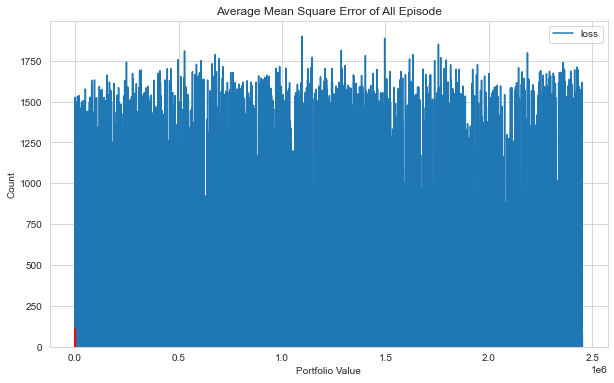

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

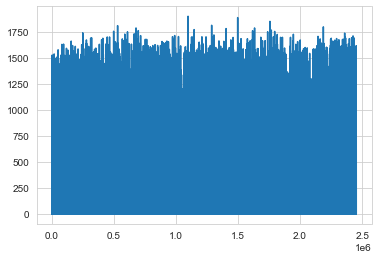

In [5]:
plt.plot(agent.model.losses)

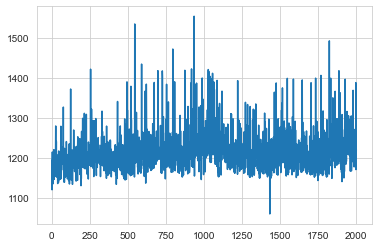

In [6]:
plt.plot(portfolio_value)

episode end value: 1226.15, duration: 0:00:00.112015
Sell: 385 times, Buy: 348 times


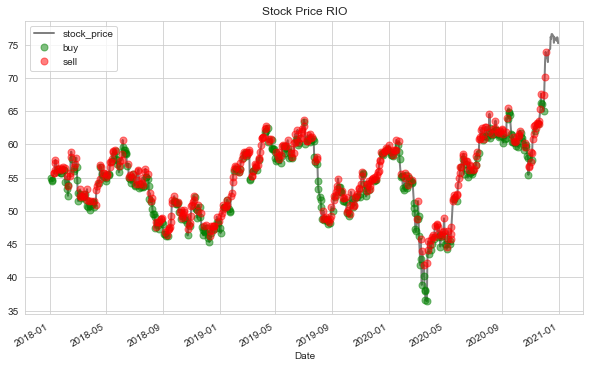

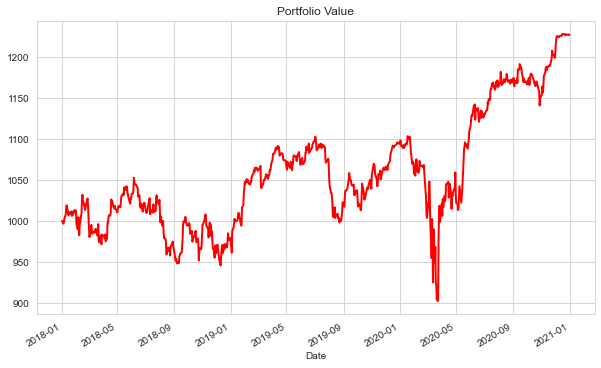

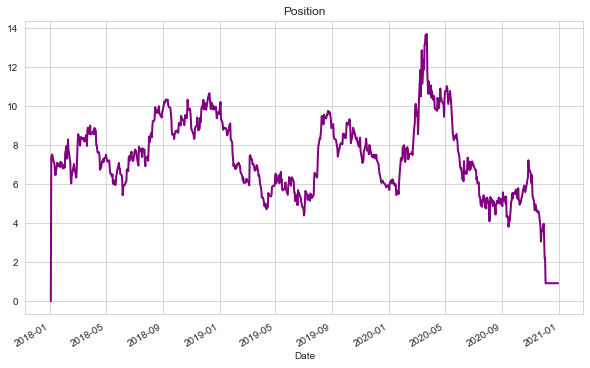

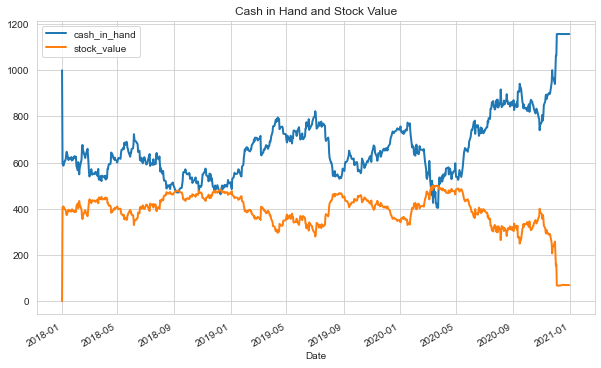

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: RIO
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 7.03 %
Volatility: 0.1442
shape ratio: 0.4114
Maximun drawdown: -18.17 %
Calmar ratio: 0.3870
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 11.17 %
Volatility (benchmark): 0.3327
shape ratio: 0.3026
Maximun drawdown: -42.85 %
Calmar ratio (benchmark): 0.2606


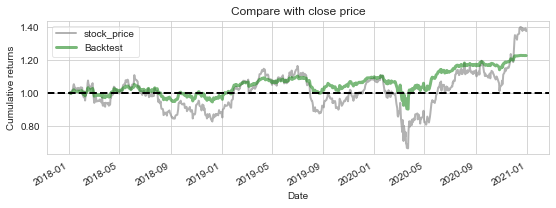

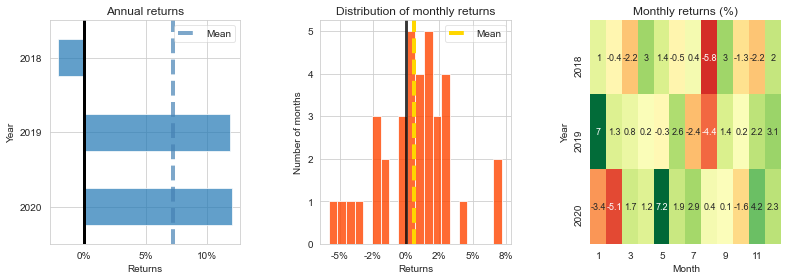

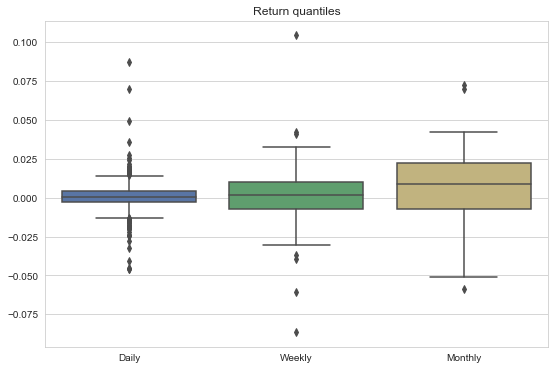

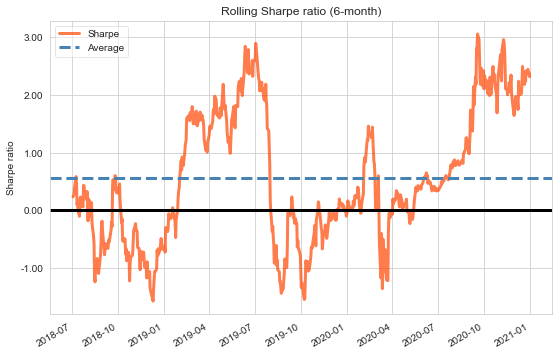

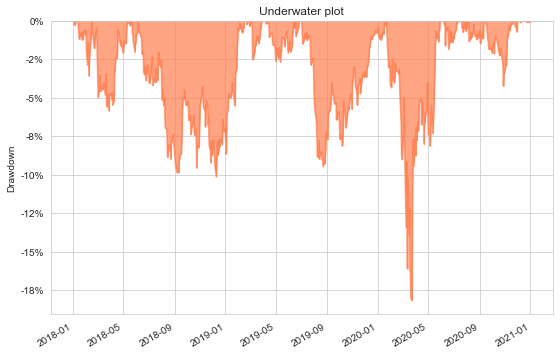

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')